In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder , LabelEncoder

# **Load Data**

In [ ]:
data_mat = pd.read_csv('/content/drive/MyDrive/python/student-mat.csv', delimiter=';', header=0)
data_por = pd.read_csv('/content/drive/MyDrive/python/student-por.csv', delimiter=';', header=0)

# Hợp nhất dữ liệu
combined_data = pd.concat([data_mat, data_por], axis=0, ignore_index=True)
combined_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
# Loại bỏ các dòng hoặc cột chứa giá trị bị thiếu (nếu ít)
combined_data.dropna(inplace=True)

In [ ]:
combined_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
combined_data.shape

(1044, 33)

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

# **Data validation**

In [ ]:
combined_data.isna().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [ ]:
combined_data.duplicated().sum()

0

# **Data Statistical**

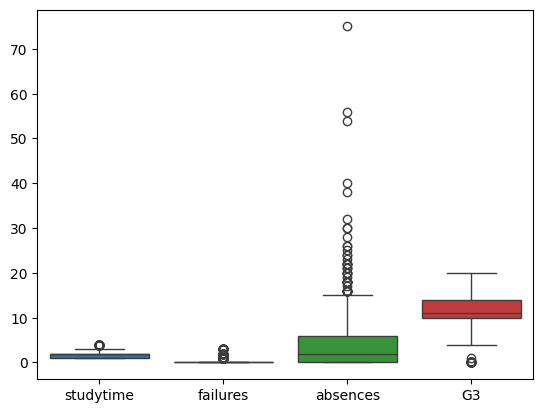

In [ ]:
# Trực quan hóa dữ liệu để phát hiện các giá trị ngoại lai (outliers) với biểu đồ boxplot
sns.boxplot(data=combined_data[['studytime', 'failures', 'absences', 'G3']])
plt.show()

# Nếu phát hiện giá trị ngoại lai, loại bỏ hoặc xử lý
combined_data = combined_data[combined_data['absences'] < combined_data['absences'].quantile(0.95)]

<ipython-input-70-25db0357e114>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data[numerical_features] = scaler.fit_transform(combined_data[numerical_features])


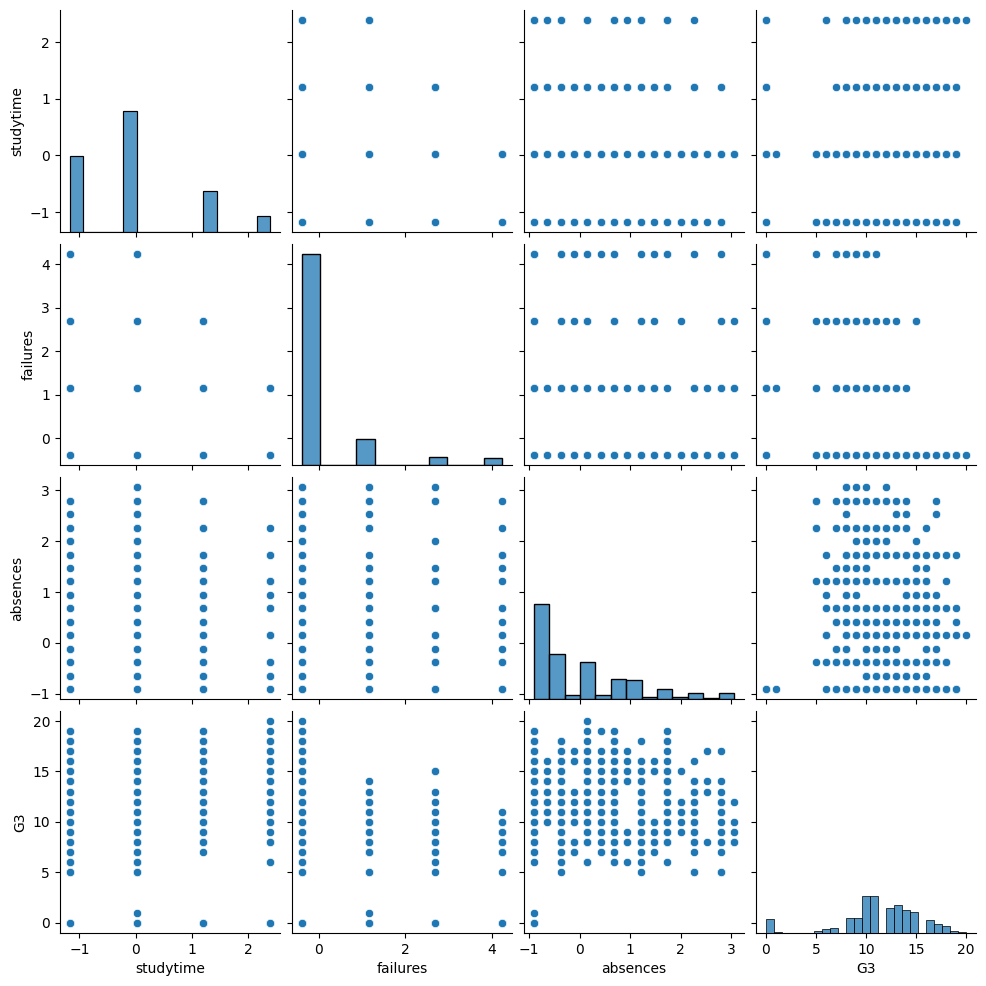

In [ ]:
# Chuẩn hóa dữ liệu (Feature Scaling) các biến số học để đảm bảo các đặc trưng có cùng thang đo
scaler = StandardScaler()
numerical_features = ['studytime', 'failures', 'absences', 'Medu', 'Fedu']
combined_data[numerical_features] = scaler.fit_transform(combined_data[numerical_features])

sns.pairplot(combined_data[['studytime', 'failures', 'absences', 'G3']])
plt.show()

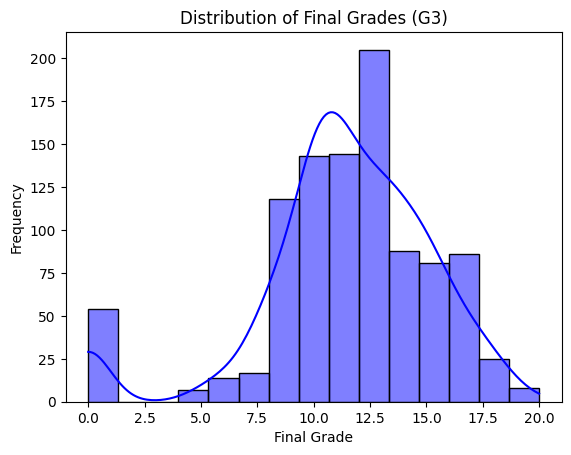

In [ ]:
# phối phân của điểm số cuối cùng
sns.histplot(combined_data['G3'], kde=True, bins=15, color='blue')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Frequency")
plt.show()

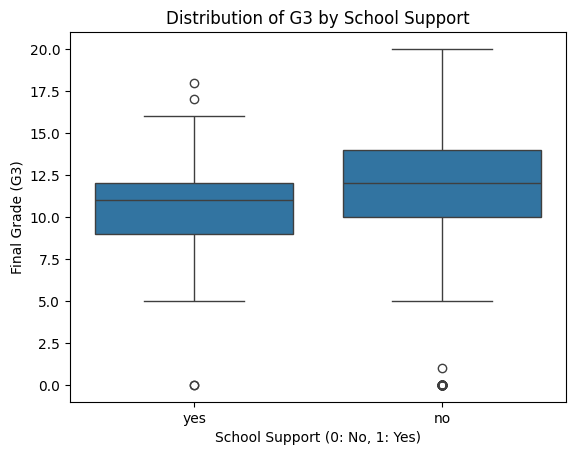

In [ ]:
sns.boxplot(x='schoolsup', y='G3', data = combined_data)
plt.title("Distribution of G3 by School Support")
plt.xlabel("School Support (0: No, 1: Yes)")
plt.ylabel("Final Grade (G3)")
plt.show()

In [ ]:
combined_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,1.242651,1.468763,at_home,teacher,...,4,3,4,1,1,3,0.679128,5,6,6
1,GP,F,17,U,GT3,T,-1.404891,-1.254225,at_home,other,...,5,3,3,1,1,3,0.150977,5,5,6
2,GP,F,15,U,LE3,T,-1.404891,-1.254225,at_home,other,...,4,3,2,2,3,3,1.735430,7,8,10
3,GP,F,15,U,GT3,T,1.242651,-0.346562,health,services,...,3,2,2,1,1,5,-0.377175,15,14,15
4,GP,F,16,U,GT3,T,0.360137,0.561101,other,other,...,4,3,2,1,2,5,0.150977,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,-0.522377,0.561101,services,other,...,5,4,2,1,2,5,0.150977,10,11,10
1040,MS,F,18,U,LE3,T,0.360137,-1.254225,teacher,services,...,4,3,4,1,1,1,0.150977,15,15,16
1041,MS,F,18,U,GT3,T,-1.404891,-1.254225,other,other,...,1,1,1,1,1,5,0.679128,11,12,9
1042,MS,M,17,U,LE3,T,0.360137,-1.254225,services,services,...,2,4,5,3,4,2,0.679128,10,10,10


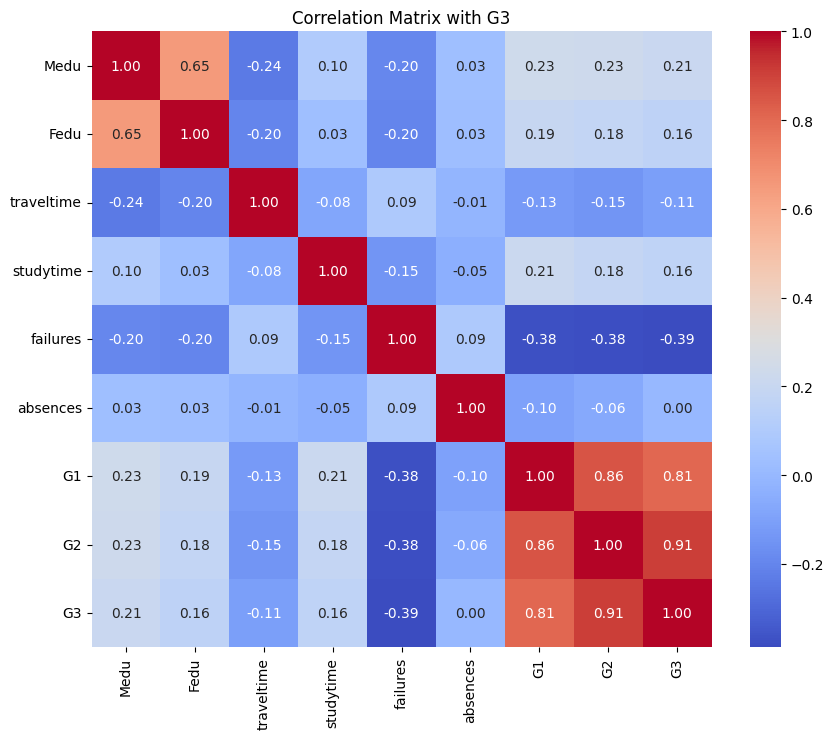

In [ ]:
# Tính toán ma trận tương quan
corr_matrix = combined_data[['Medu', 'Fedu', 'traveltime', 'studytime',
                             'failures', 'absences', 'G1', 'G2', 'G3']].corr()

# Hiển thị ma trận tương quan dưới dạng heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix with G3")
plt.show()

# **Model**

## **Chia dữ liệu để huấn luyện**

In [ ]:
# Chọn các biến cần thiết
selected_features = ['G1', 'G2', 'studytime', 'failures', 'absences',
                     'higher', 'schoolsup', 'famsup', 'G3']

# Lọc dữ liệu chỉ giữ lại các biến cần thiết
filtered_data = combined_data[selected_features]

# Chuyển đổi các biến phân loại (categorical) thành dạng số
filtered_data['higher'] = filtered_data['higher'].map({'yes': 1, 'no': 0})
filtered_data['schoolsup'] = filtered_data['schoolsup'].map({'yes': 1, 'no': 0})
filtered_data['famsup'] = filtered_data['famsup'].map({'yes': 1, 'no': 0})

<ipython-input-75-6f12863b9eaa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['higher'] = filtered_data['higher'].map({'yes': 1, 'no': 0})
<ipython-input-75-6f12863b9eaa>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['schoolsup'] = filtered_data['schoolsup'].map({'yes': 1, 'no': 0})
<ipython-input-75-6f12863b9eaa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [ ]:
# Tách dữ liệu đầu vào (X) và đầu ra (y)
X = filtered_data.drop(columns=['G3'])
y = filtered_data['G3']

# Chuẩn hóa các biến liên tục
scaler = StandardScaler()
X[['G1', 'G2', 'studytime', 'failures', 'absences']] = scaler.fit_transform(
    X[['G1', 'G2', 'studytime', 'failures', 'absences']]
)

# Chuyển hóa nhãn cho Logistic Regression (nhị phân hóa G3 thành: 0 nếu <10, 1 nếu >=10)
y_binary = (y >= 10).astype(int)

# Tách dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

## **Linear Regression Model**

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y = y.values.ravel()
        for _ in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def calculate_accuracy(self, y_true, y_pred):
        y_true = np.array(y_true).ravel()
        y_pred = np.array(y_pred).ravel()

        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        r_squared = 1 - (ss_residual / ss_total)
        return r_squared

## **Logistic Regression Model**

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.05, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (predictions - y))
            db = (1 / num_samples) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return (predictions >= 0.5).astype(int)

## **Huấn luyện mô hình và dự đoán cho bài toán**

In [ ]:
# Các tham số cần thử nghiệm
learning_rates = [0.001, 0.01, 0.1, 1, 3, 5]
num_iterations_list = [100, 500, 1000, 10000]

# Lưu kết quả
results = []
best_accuracy = 0
# Vòng lặp thử nghiệm mô hình
for lr in learning_rates:
    for n_iter in num_iterations_list:
        print(f"Training model with learning_rate={lr}, num_iterations={n_iter}")

        # Khởi tạo mô hình
        logistic_model = LogisticRegression()

        # Huấn luyện mô hình
        logistic_model.fit(X_train.to_numpy(), y_train.to_numpy())

        # Dự đoán
        y_pred_logistic = logistic_model.predict(X_test.to_numpy())

        # Tính độ chính xác
        accuracy = accuracy_score(y_test, y_pred_logistic)
        print(f"Accuracy: {accuracy*100:.2f}%")

        # Lưu kết quả
        results.append({
            "learning_rate": lr,
            "num_iterations": n_iter,
            "accuracy": accuracy
        })

        # Nếu độ chính xác của mô hình này tốt nhất, lưu lại kết quả
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            lr_build = {
                "Accuracy": best_accuracy,
                "Precision": precision_score(y_test, y_pred_logistic),
                "Recall": recall_score(y_test, y_pred_logistic),
                "F1 Score": f1_score(y_test, y_pred_logistic)
            }

# Chuyển đổi kết quả thành DataFrame
results_df = pd.DataFrame(results)

# Hiển thị kết quả tốt nhất
print("\nBest Results:")
print(f"Logistic Accuracy: {lr_build['Accuracy']*100:.2f}%")
print(f"Precision: {lr_build['Precision']*100:.2f}%")
print(f"Recall: {lr_build['Recall']*100:.2f}%")
print(f"F1 Score: {lr_build['F1 Score']*100:.2f}%")

# Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
print("\nConfusion Matrix:")
print(conf_matrix)

# Tính các chỉ số precision, recall, và f1 score
precision = precision_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic)

# Lưu kết quả vào file CSV
results_df.to_csv('logistic_regression_results.csv', index=False)
print("\nResults saved to logistic_regression_results.csv")

Training model with learning_rate=0.001, num_iterations=100
Accuracy: 88.38%
Training model with learning_rate=0.001, num_iterations=500
Accuracy: 88.38%
Training model with learning_rate=0.001, num_iterations=1000
Accuracy: 88.38%
Training model with learning_rate=0.001, num_iterations=10000
Accuracy: 88.38%
Training model with learning_rate=0.01, num_iterations=100
Accuracy: 88.38%
Training model with learning_rate=0.01, num_iterations=500
Accuracy: 88.38%
Training model with learning_rate=0.01, num_iterations=1000
Accuracy: 88.38%
Training model with learning_rate=0.01, num_iterations=10000
Accuracy: 88.38%
Training model with learning_rate=0.1, num_iterations=100
Accuracy: 88.38%
Training model with learning_rate=0.1, num_iterations=500
Accuracy: 88.38%
Training model with learning_rate=0.1, num_iterations=1000
Accuracy: 88.38%
Training model with learning_rate=0.1, num_iterations=10000
Accuracy: 88.38%
Training model with learning_rate=1, num_iterations=100
Accuracy: 88.38%
Traini

In [ ]:
parameter_combinations = [
    {"learning_rate": 0.001, "epochs": 500},
    {"learning_rate": 0.001, "epochs": 1000},
    {"learning_rate": 0.001, "epochs": 5000},
    {"learning_rate": 0.01, "epochs": 100},
    {"learning_rate": 0.01, "epochs": 500},
    {"learning_rate": 0.01, "epochs": 1000},
    {"learning_rate": 0.01, "epochs": 5000},
    {"learning_rate": 0.01, "epochs": 10000},
    {"learning_rate": 0.1, "epochs": 100},
    {"learning_rate": 0.1, "epochs": 500},
    {"learning_rate": 0.1, "epochs": 1000},
    {"learning_rate": 0.1, "epochs": 5000},
    {"learning_rate": 0.5, "epochs": 500},
    {"learning_rate": 0.5, "epochs": 1000},
    {"learning_rate": 0.5, "epochs": 5000},
]

# Lưu kết quả
results = []

for params in parameter_combinations:
    lr = params["learning_rate"]
    epochs = params["epochs"]

    # Khởi tạo mô hình với learning_rate và epochs
    model = LinearRegression(learning_rate=lr, epochs=epochs)
    model.fit(X_train, y_train)

    # Dự đoán và tính R-squared
    predictions = model.predict(X_test)
    r_squared = model.calculate_accuracy(y_test, predictions)

    # Lưu lại learning_rate, epochs và R-squared
    results.append((lr, epochs, r_squared))

# Chuyển kết quả thành DataFrame để dễ hiển thị
results_df = pd.DataFrame(results, columns=["Learning Rate", "Epochs", "R-squared"])

model = LinearRegression(learning_rate=0.01, epochs=10000)

model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Dự đoán điểm số:", predictions)
r_squared = model.calculate_accuracy(y_test, predictions)
print("R-squared:", r_squared)

Dự đoán điểm số: [ 7.22709450e-01  1.13161045e+00  9.75573784e-01  6.22662688e-01
  7.41518784e-01  5.31300553e-01  7.96341092e-01  1.41189784e+00
  7.34368661e-01  5.29935969e-01  3.24057291e-01  8.92780986e-01
  9.03237159e-01  1.22984113e+00  1.16227897e+00  6.09796854e-01
  5.57563392e-01  9.41819305e-01  9.08486601e-01  7.34666448e-01
  9.88582806e-01  9.86237205e-01  9.28934270e-01  6.66485566e-01
  1.59627609e-01  1.16362878e+00  5.28818697e-01  7.94603508e-01
  8.20919340e-01  7.15542331e-02  1.04329126e+00  7.62585174e-01
  9.83333364e-01  1.00695260e+00  8.50538868e-01  1.09487086e+00
  9.46593770e-01  1.55671079e-02  1.04733767e+00  7.71459246e-01
  1.15958238e+00  6.87408213e-01  1.20962878e+00  1.09217426e+00
  6.03851914e-01  8.50538868e-01  9.31363133e-01  1.19424410e+00
  1.00354571e+00  1.94666610e-01  4.06940494e-01  5.67112320e-01
  8.03863913e-01  7.18930775e-01  7.53324768e-01  1.32892586e+00
  1.03044786e+00  6.47058821e-01  9.36137597e-01  1.33191097e+00
  6.9516

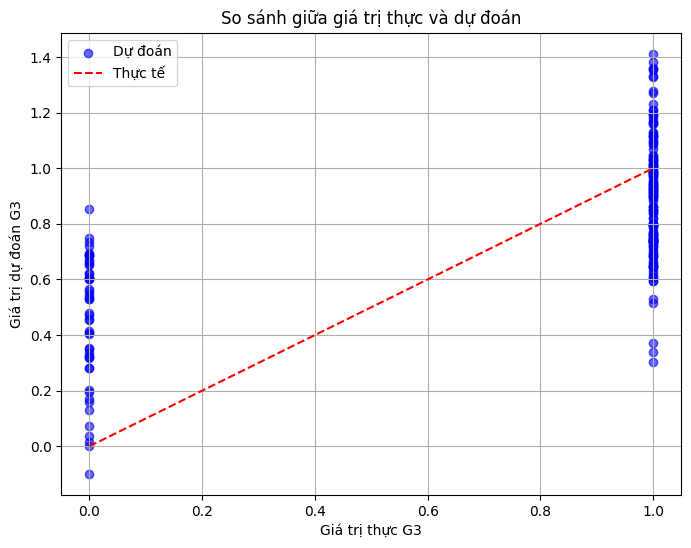

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6, color="blue", label="Dự đoán")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Thực tế")
plt.xlabel("Giá trị thực G3")
plt.ylabel("Giá trị dự đoán G3")
plt.title("So sánh giữa giá trị thực và dự đoán")
plt.legend()
plt.grid()
plt.show()

# **So sánh và đánh giá mô hình**

Results for Linear Regression:
Mean Squared Error (MSE): 0.11198247564923829
Mean Absolute Error (MAE): 0.2604870046827912
R-squared Score: 0.41441096767337093

Results for Logistic Regression:
Mean Squared Error (MSE): 0.11616161616161616
Mean Absolute Error (MAE): 0.11616161616161616
R-squared Score: 0.39255702280912363

                 Model       MSE       MAE  R2 Score
0    Linear Regression  0.111982  0.260487  0.414411
1  Logistic Regression  0.116162  0.116162  0.392557


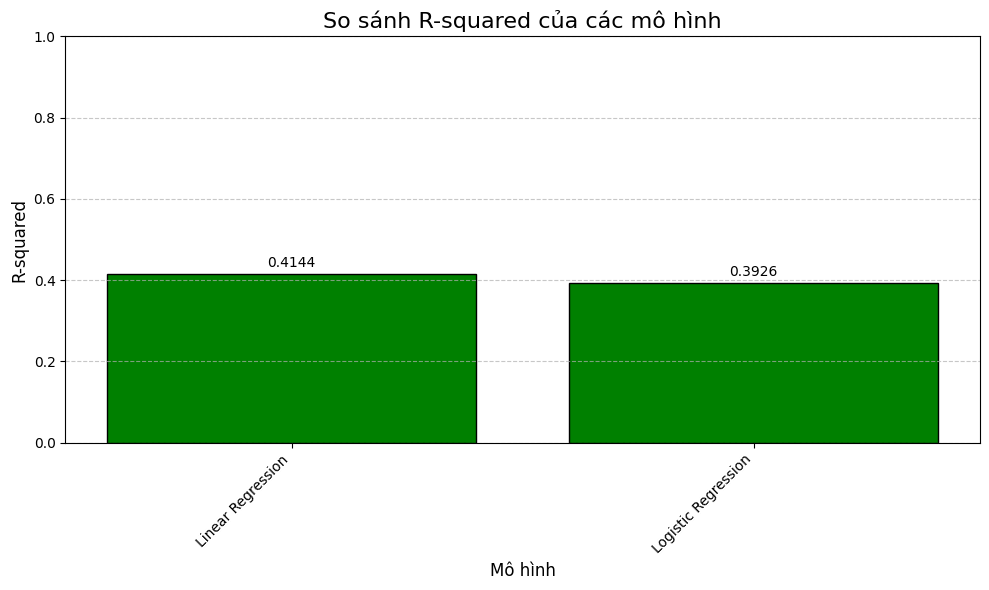

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(),
}

accuracy = []
results = []
predictions = {name: [] for name in models}

for name, model in models.items():
    model.fit(X_train, y_train) if hasattr(model, 'fit') else model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred) if name != 'Custom Linear Regression' else model.calculate_accuracy(y_test, y_pred)
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    results.append({'Model': name, 'MSE': mse, 'MAE': mae, 'R2 Score': r2})
    print()

results_df = pd.DataFrame(results)
print(results_df)

plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['R2 Score'], color='green', edgecolor='black')

for index, row in results_df.iterrows():
    plt.text(index, row['R2 Score'] + 0.01, f"{row['R2 Score']:.4f}", ha='center', va='bottom', fontsize=10)

plt.title("So sánh R-squared của các mô hình", fontsize=16)
plt.xlabel("Mô hình", fontsize=12)
plt.ylabel("R-squared", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.ylim(0, 1)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()